In [140]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [152]:
df = pd.read_csv("../input/human-activity-recognition-with-rnn/train.csv")

In [154]:
df.shape
df = df.drop(['id'], axis=1)
df.head()

,0,1,2,3,4
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629
tBodyAcc-mean()-Y,-0.020294,-0.016411,-0.019467,-0.026201,-0.016570
tBodyAcc-mean()-Z,-0.132905,-0.123520,-0.113462,-0.123283,-0.115362
tBodyAcc-std()-X,-0.995279,-0.998245,-0.995380,-0.996091,-0.998139
tBodyAcc-std()-Y,-0.983111,-0.975300,-0.967187,-0.983403,-0.980817
...,...,...,...,...,...
"angle(X,gravityMean)",-0.841247,-0.844788,-0.848933,-0.848649,-0.847865
"angle(Y,gravityMean)",0.179941,0.180289,0.180637,0.181935,0.185151
"angle(Z,gravityMean)",-0.058627,-0.054317,-0.049118,-0.047663,-0.043892
subject,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
df_participants = []
df_participants_labels = []
data_points = {}
for p in range(1,df.subject.max()+1):
    if not df[df['subject']==p].empty:
        df_participants.append(df[df['subject']==p])
        data_points[p] = (int(df_participants[-1]['subject'].value_counts()))
        df_participants[-1] = df_participants[-1].drop(['subject'], axis=1)
        df_participants_labels.append(df_participants[-1]['activity'].to_list())
        df_participants[-1] = df_participants[-1].drop(['activity'], axis=1)
print(data_points)

{1: 347, 3: 341, 5: 302, 6: 325, 7: 308, 8: 281, 11: 316, 14: 323, 15: 328, 16: 366, 17: 368, 19: 360, 21: 408, 22: 321, 23: 372, 25: 409, 26: 392, 27: 376, 28: 382, 29: 344, 30: 383}


<BarContainer object of 21 artists>

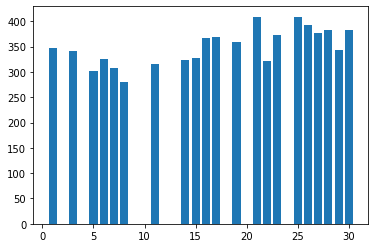

In [104]:
plt.bar(*zip(*data_points.items()))

In [215]:
#LSTM inputs: A 3D tensor with shape [batch, timesteps, feature].
def create_batches(data, labels, batch_size=5):
    no = data.shape[0]//batch_size
    X = np.zeros((0, batch_size,data.shape[1]))
    Y = np.zeros((0, batch_size))
    labels = np.array(labels)
    for i in range(0, no):
        batchx = data.iloc[i*batch_size:(i+1)*batch_size, :].to_numpy()
        batchx = batchx.reshape(1, batch_size, data.shape[1])
        batchy = labels[i*batch_size:(i+1)*batch_size]
        batchy = batchy.reshape(1, batch_size)
        X = np.concatenate((X, batchx))
        Y = np.concatenate((Y, batchy))
    return X, Y

In [222]:
batch_size = 5
X = np.zeros((0, batch_size, df_participants[0].shape[1]))
Y = np.zeros((0, batch_size))
for index in range(len(df_participants)):
    x,y = create_batches(df_participants[index], df_participants_labels[index])
    X = np.concatenate((X,x))
    Y = np.concatenate((Y,y))

In [261]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(8, input_shape=(batch_size, df_participants[0].shape[1]), return_sequences=True))
model.add(tf.keras.layers.LSTM(16, input_shape=(batch_size, df_participants[0].shape[1]), return_sequences=True))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(7, activation="sigmoid"))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 5, 8)              18240     
_________________________________________________________________
dense_27 (Dense)             (None, 5, 32)             288       
_________________________________________________________________
dense_28 (Dense)             (None, 5, 7)              231       
Total params: 18,759
Trainable params: 18,759
Non-trainable params: 0
_________________________________________________________________


In [262]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 5, 8)              18240     
_________________________________________________________________
dense_27 (Dense)             (None, 5, 32)             288       
_________________________________________________________________
dense_28 (Dense)             (None, 5, 7)              231       
Total params: 18,759
Trainable params: 18,759
Non-trainable params: 0
_________________________________________________________________


In [265]:
history = model.fit(X, Y, epochs=30, batch_size=10, validation_split = 0.2)


Epoch 1/30
117/117 [==============================] - 1s 6ms/step - loss: 0.2549 - accuracy: 0.9264 - val_loss: 0.3078 - val_accuracy: 0.8949
Epoch 2/30
117/117 [==============================] - 1s 5ms/step - loss: 0.1947 - accuracy: 0.9405 - val_loss: 0.2477 - val_accuracy: 0.9195
Epoch 3/30
117/117 [==============================] - 1s 5ms/step - loss: 0.1483 - accuracy: 0.9516 - val_loss: 0.2562 - val_accuracy: 0.9276
Epoch 4/30
117/117 [==============================] - 1s 5ms/step - loss: 0.1395 - accuracy: 0.9553 - val_loss: 0.3042 - val_accuracy: 0.8683
Epoch 5/30
117/117 [==============================] - 1s 5ms/step - loss: 0.1404 - accuracy: 0.9475 - val_loss: 0.2396 - val_accuracy: 0.9331
Epoch 6/30
117/117 [==============================] - 1s 5ms/step - loss: 0.1043 - accuracy: 0.9637 - val_loss: 0.2503 - val_accuracy: 0.9085
Epoch 7/30
117/117 [==============================] - 1s 5ms/step - loss: 0.0960 - accuracy: 0.9701 - val_loss: 0.1681 - val_accuracy: 0.9420
Epoch 

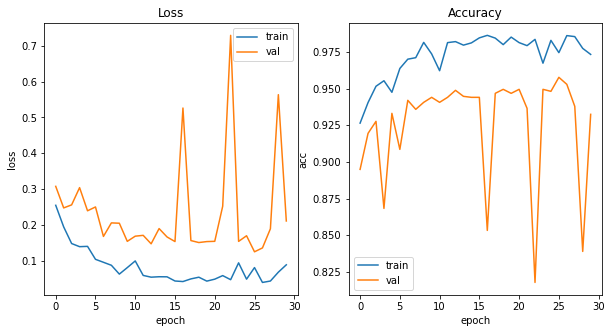

In [266]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].set_title('Loss')
axs[0].plot(history.history['loss'], label='train')
axs[0].plot(history.history['val_loss'], label='val')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend()

axs[1].set_title('Accuracy')
axs[1].plot(history.history['accuracy'], label='train')
axs[1].plot(history.history['val_accuracy'], label='val')
axs[1].set_ylabel('acc')
axs[1].set_xlabel('epoch')
axs[1].legend()